<a href="https://colab.research.google.com/github/seunghee0518/R_File/blob/main/R_%EC%98%88%EC%B8%A1%EB%B0%A9%EB%B2%95%EB%A1%A0_5%EA%B0%95_%EC%8B%9C%EA%B3%84%EC%97%B4%EB%AA%A8%ED%98%95%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#R을 이용한 실습

## 단위근검정
로그변환된 계절변동조정 GDP의 수준변수 및 1차 차분변수에 대해 ADF검정을 실시하는 코드

ADF를 검정하는 함수 : adf.test

In [ ]:
#패키지 가져오기
install.packages("tseries")
library(tseries)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘zoo’, ‘quantmod’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [ ]:
#계절변동조정 GDP
url_gdp_sa <- "https://raw.githubusercontent.com/seunghee0518/R_File/main/%EC%98%88%EC%B8%A1%EB%B0%A9%EB%B2%95%EB%A1%A0/gdp_2.8.csv"
gdp <- read.csv(url_gdp_sa, header=T)
gdp_sa <- ts(gdp[, 2]/1000, start=1970, frequency = 4)
head(gdp_sa)

[1] 17.1097 17.7977 17.9078 19.2875 19.3957 20.0275

In [ ]:
#단위근검정: 로그변환된 계절변동조정 GDP,
adf.test(log(gdp_sa))

Warning message in adf.test(log(gdp_sa)):
“p-value greater than printed p-value”



	Augmented Dickey-Fuller Test

data:  log(gdp_sa)
Dickey-Fuller = 0.32557, Lag order = 5, p-value = 0.99
alternative hypothesis: stationary


In [ ]:
#단위근검정: 1차 차분된 로그변환된 계절변동조정 GDP
adf.test(diff(log(gdp_sa)))

Warning message in adf.test(diff(log(gdp_sa))):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  diff(log(gdp_sa))
Dickey-Fuller = -6.1919, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary


##ARIMA모형의 작성
월변 종합주가지수에 대한 ARIMA모형을 작성하고 이를 이용해 12개월 앞을 예측하는 코드


In [ ]:
#패키지 가져오기
install.packages("forecast")
library(forecast)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘urca’, ‘RcppArmadillo’




In [ ]:
#데이터 가져오기(예5-5, ARIMA모형작성에 사용함)
url_kospi <- "https://raw.githubusercontent.com/seunghee0518/R_File/main/%EC%98%88%EC%B8%A1%EB%B0%A9%EB%B2%95%EB%A1%A0/kospi(1993.01~2021.2%2C%20%EC%9B%94%EB%B3%84).csv"
kospi_file <- read.csv(url_kospi)
fin <- ts(kospi_file, start=1993, frequency=12)
kospi <- fin[, 1]

## 예 5-1 로그변환된 계절변동조정 gdp추이

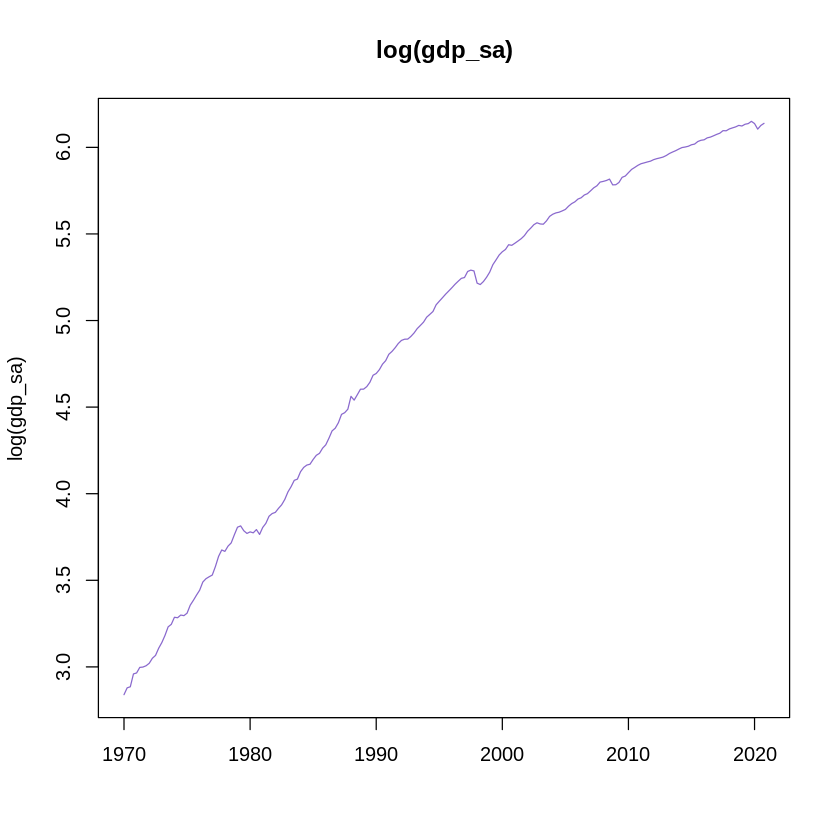

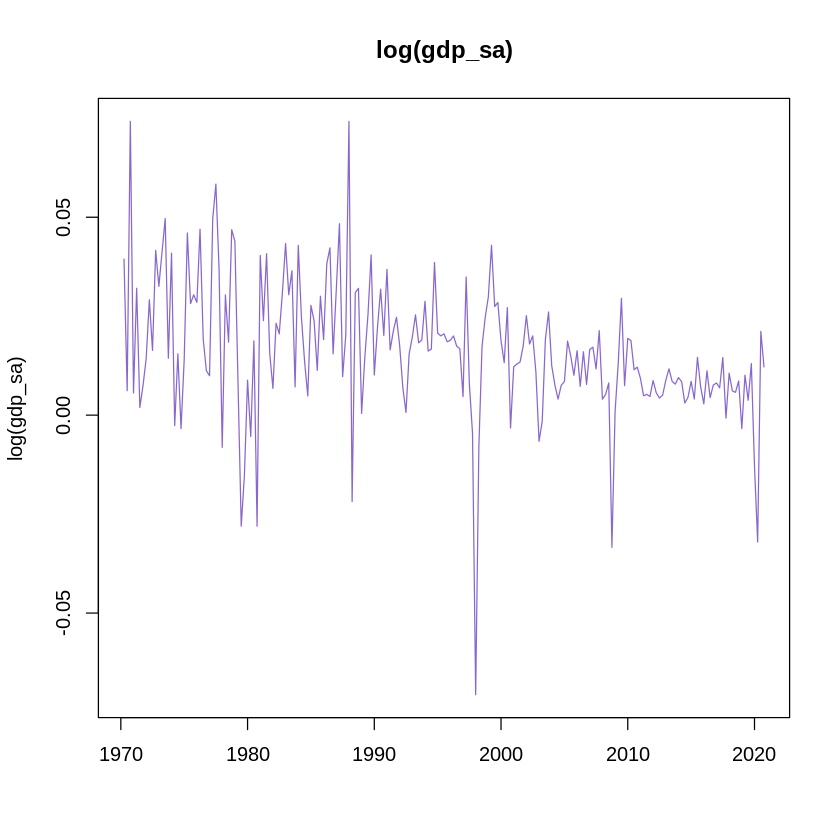

In [ ]:
#로그변환된 계절변동조정 gdp추이
url_sa = "https://raw.githubusercontent.com/seunghee0518/R_File/main/%EC%98%88%EC%B8%A1%EB%B0%A9%EB%B2%95%EB%A1%A0/%EA%B2%BD%EC%A0%9C%ED%99%9C%EB%8F%99%EB%B3%84%20GDP(%EA%B3%84%EC%A0%88%EC%A1%B0%EC%A0%95%2C%20%EC%8B%A4%EC%A7%88%2C%20%EB%B6%84%EA%B8%B0)_%EC%A0%9C%EC%A1%B0%EC%97%85.csv"
gdp_sa = read.csv(url_sa)
gdp_sa = ts(gdp_sa[, 2]/1000, start=1970, frequency=4)

plot(log(gdp_sa), ylab = "log(gdp_sa)", xlab = "", col = "mediumpurple3", main="log(gdp_sa)")
#1차분계열
plot(diff(log(gdp_sa)), ylab = "log(gdp_sa)", xlab = "", col = "mediumpurple3", main="log(gdp_sa)")

## 예 5-2 로그변환된 GDP 원계열과 1차 차분과 4차차분(계절차분)을 동시에 실시한 시계열



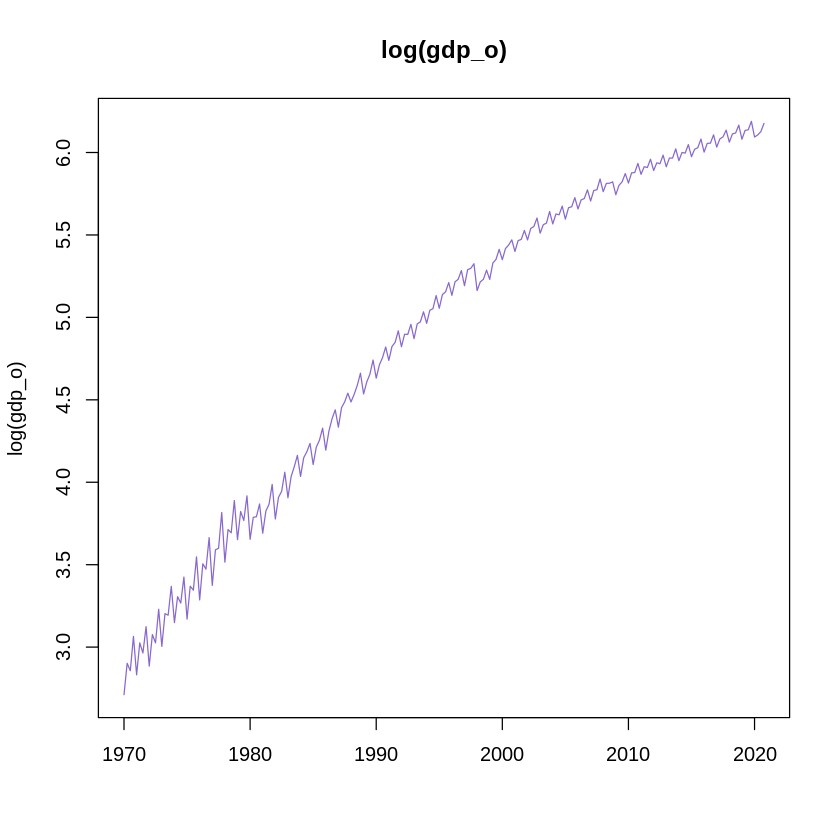

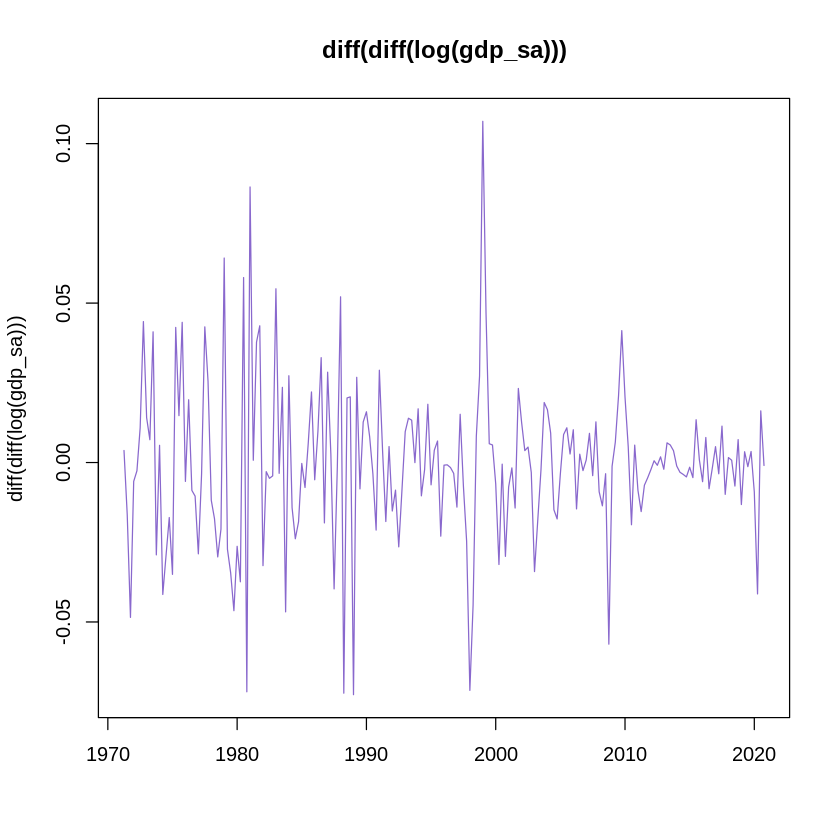

In [ ]:
#로그변화된 GDP 원계열과 1차 및 4차 차분계열 추이
url_o = "https://raw.githubusercontent.com/seunghee0518/R_File/main/%EC%98%88%EC%B8%A1%EB%B0%A9%EB%B2%95%EB%A1%A0/%EA%B2%BD%EC%A0%9C%ED%99%9C%EB%8F%99%EB%B3%84%20GDP(%EC%9B%90%EA%B3%84%EC%97%B4%2C%20%EC%8B%A4%EC%A7%88%2C%20%EB%B6%84%EA%B8%B0)_%EC%A0%9C%EC%A1%B0%EC%97%85.csv"
gdp_o = read.csv(url_o)
gdp_o = ts(gdp_o[, 2]/1000, start=1970, frequency=4)

#로그변환된 gdp 원계열
plot(log(gdp_o), ylab = "log(gdp_o)", xlab = "", col = "mediumpurple3", main="log(gdp_o)")

#4차 차분(1차분+4차차분) => 안정시계열이됨
plot(diff(diff(log(gdp_o)), 4), ylab = "diff(diff(log(gdp_sa)))", xlab = "", col = "mediumpurple3", main="diff(diff(log(gdp_sa)))")

## 예 5-3 로그변환된 종합주가지수의 ARIMA모형 식별
로그변환된 종합주가지수의 1차차분의 상관도표
,부분상관도표

=> 둘다 유의함(유의확률 안에 있음), 따라서 로그변환된 종합주가지수는 ARIMA(1, 1, 0)/ARIMA(0, 1, 1)모형으로 식별될 수 있음 

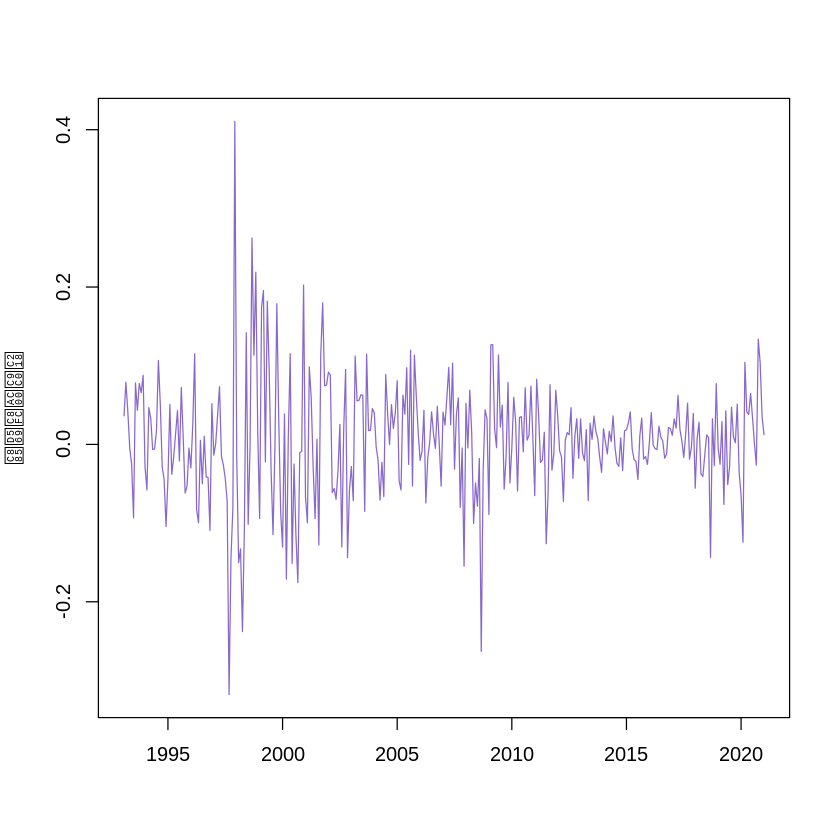

In [ ]:
#종합주가지수(kospi) 그래프
plot(diff(log(kospi)), ylab = "종합주가지수", xlab = "", col = "mediumpurple3", main="")

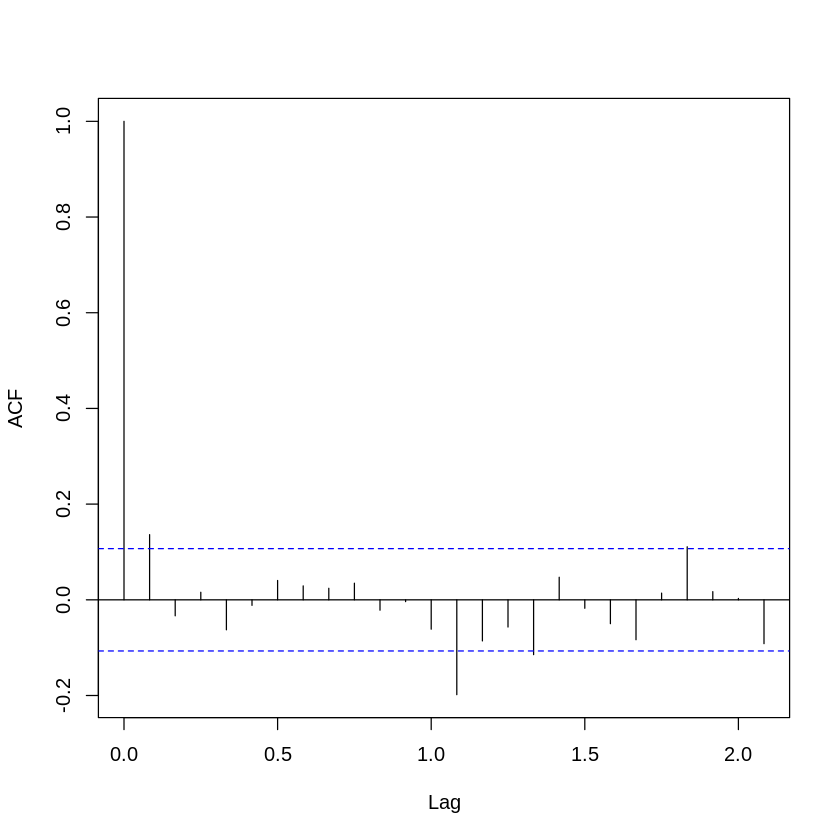

In [ ]:
#kospi의 로그 1차 차분계열의 상관도표
acf(diff(log(kospi)), main="")

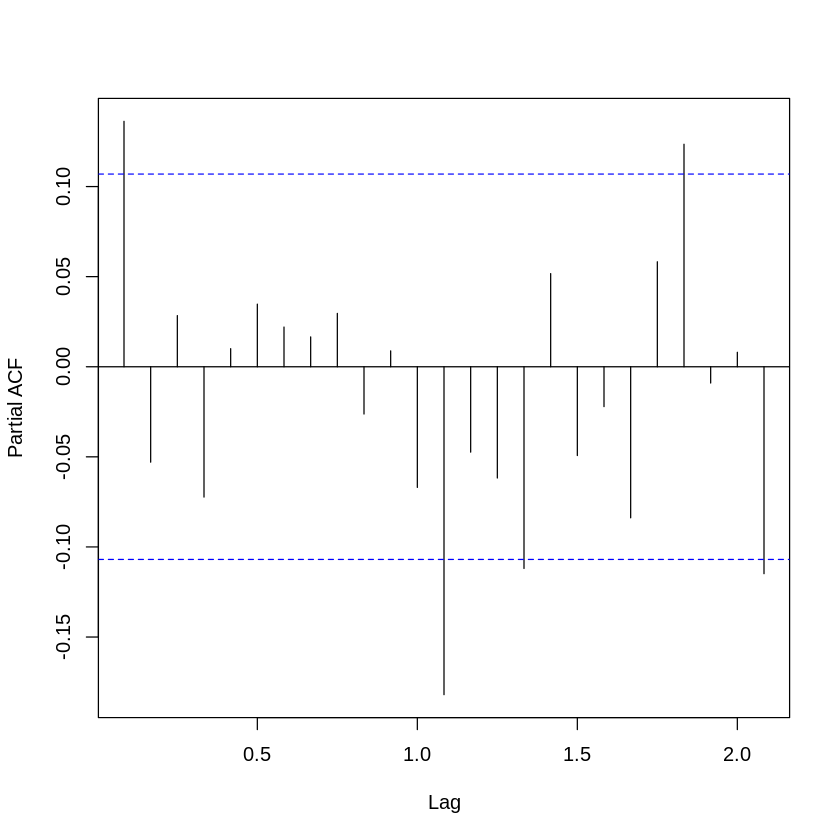

In [ ]:
#kospi의 로그1차 차분계열 부분상관도표
pacf(diff(log(kospi)), main="")

## 예 5-4 로그변환된 GDP 원계열의 ARIMA모형 식별
로그변환된 GDP 원계열의 1차 및 4차 차분계열 상관도표와 부분상관도표

=> 계절시차(1년)인 4차의 자기상관계수 및 부분자기상관계수가 유의하여 로그변환된 GDP는 ARIMA(0, 1, 0)(1, 1, 1)4모형으로 우선 식별됨

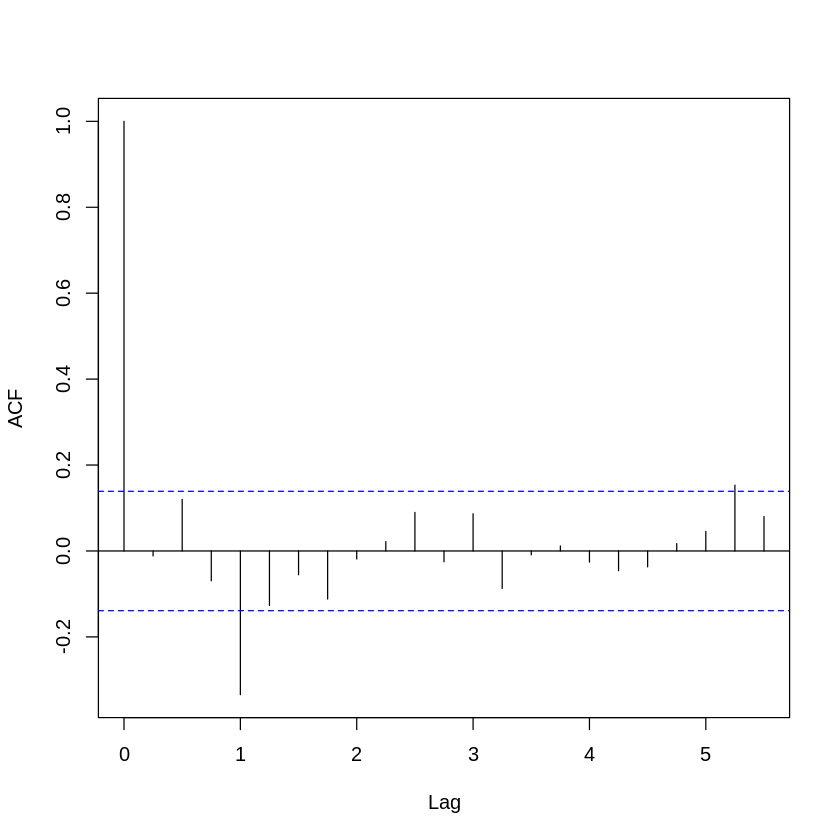

In [ ]:
#로그변환된 GDP 원계열의 1차 및 4차 차분계열 상관도표
acf(diff(diff(log(gdp_o)), 4), main="")

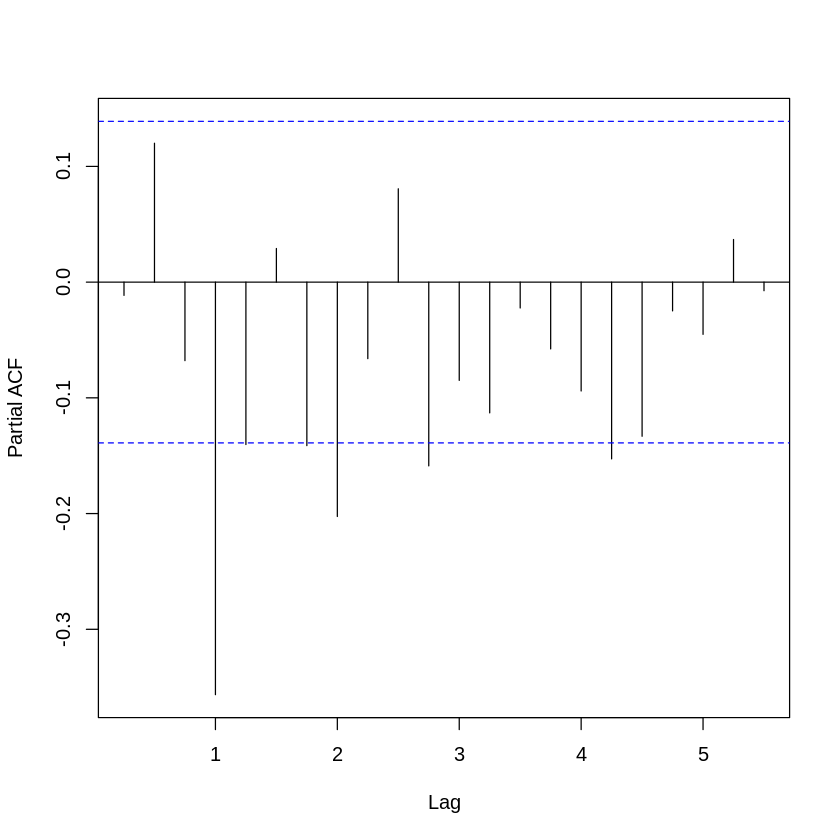

In [ ]:
#로그변환된 GDP 원계열의 1차 및 4차 차분계열 부분상관도표
pacf(diff(diff(log(gdp_o)), 4), main="")

#ARIMA모형의 추정

##예 5-5 로그변환된 종합주가지수의 ARIMA모형 추정
초기 식별한대로 ARIMA(1, 1, 0)과 ARIMA(0, 1, 1)추정함

ARIMA(0, 1, 1)의 AIC(BIC) : -788.27 / 
ARIMA(1, 1, 0)의 AIC(BIC) : -787.62

ARIMA(0, 1, 1) < ARIMA(1, 1, 0)
ARIMA(0, 1, 1)이 더 적절해 보임

In [ ]:
#월별 kospi의 로그1차 차분계열의 ARIMA(1, 1, 0)
ARIMA_110 = arima(log(kospi), order=c(1, 1, 0))
summary(ARIMA_110)


Call:
arima(x = log(kospi), order = c(1, 1, 0))

Coefficients:
        ar1
      0.139
s.e.  0.054

sigma^2 estimated as 0.00555:  log likelihood = 395.81,  aic = -787.62

Training set error measures:
                      ME       RMSE        MAE        MPE      MAPE      MASE
Training set 0.003969475 0.07438936 0.05282598 0.04978059 0.7709102 0.9844341
                    ACF1
Training set 0.004604156


In [ ]:
#월별 kospi의 로그1차 차분계열의 ARIMA(0, 1, 1)
ARIMA_011 = arima(log(kospi), order=c(0, 1, 1))
summary(ARIMA_011)


Call:
arima(x = log(kospi), order = c(0, 1, 1))

Coefficients:
         ma1
      0.1535
s.e.  0.0566

sigma^2 estimated as 0.005539:  log likelihood = 396.13,  aic = -788.27

Training set error measures:
                      ME       RMSE        MAE        MPE     MAPE      MASE
Training set 0.003995136 0.07431707 0.05271011 0.05009857 0.769221 0.9822748
                     ACF1
Training set -0.008575825


In [ ]:
#월별 kospi의 로그1차 차분계열의 ARIMA모형 추정 = ARIMA(0, 1, 1)이 더 적합함
kospi_fit = ARIMA_011

## 예 5-6 로그변환된 종합주가지수 ARIMA추정모형에 한 과대적합진단

ARIMA(0, 1, 1) : aic = -788.27
ARIMA(1, 1, 1) : aic = -787.36
ARIMA(0, 1, 2) : aic = -786.87
=> ARIMA(0, 1, 1) 가장 작음 : 가장 적절함

In [ ]:
#월별 kospi의 로그 1차 차분계열의 ARIMA모형의 과대적합 검토(예 5-6)
kospi_fit1 = arima(log(kospi), order=c(1, 1, 1))
summary(kospi_fit1)
kospi_fit2 = arima(log(kospi), order=c(0, 1, 2))
summary(kospi_fit2)


Call:
arima(x = log(kospi), order = c(1, 1, 1))

Coefficients:
          ar1     ma1
      -0.4027  0.5475
s.e.   0.3002  0.2755

sigma^2 estimated as 0.005521:  log likelihood = 396.68,  aic = -787.36

Training set error measures:
                      ME       RMSE        MAE        MPE      MAPE      MASE
Training set 0.004173155 0.07419461 0.05258464 0.05226798 0.7675095 0.9799366
                    ACF1
Training set 0.003117551

Call:
arima(x = log(kospi), order = c(0, 1, 2))

Coefficients:
         ma1      ma2
      0.1505  -0.0445
s.e.  0.0544   0.0571

sigma^2 estimated as 0.005529:  log likelihood = 396.44,  aic = -786.87

Training set error measures:
                      ME       RMSE        MAE        MPE      MAPE      MASE
Training set 0.004162591 0.07424954 0.05256687 0.05213248 0.7672098 0.9796054
                     ACF1
Training set -0.004105996


## 예 5-7 로그변환된 종합주가지수의 ARIMA추정모형의 잔차분석
첫번째 그림 : 표준화된 잔차 => 특별한 패턴 안보임
두번째 그림 : 잔차의 상관도표 => 거의 모든 자기상관계수가 점선 내에 있음
세번째 그림 : 륭-박스 검정의 유의확률 => 모든 시차에서 유의수준인 점선(0.05)보다 크다
따라서 ARIMA(0, 1, 1)모형은 적절하다고 판단됨

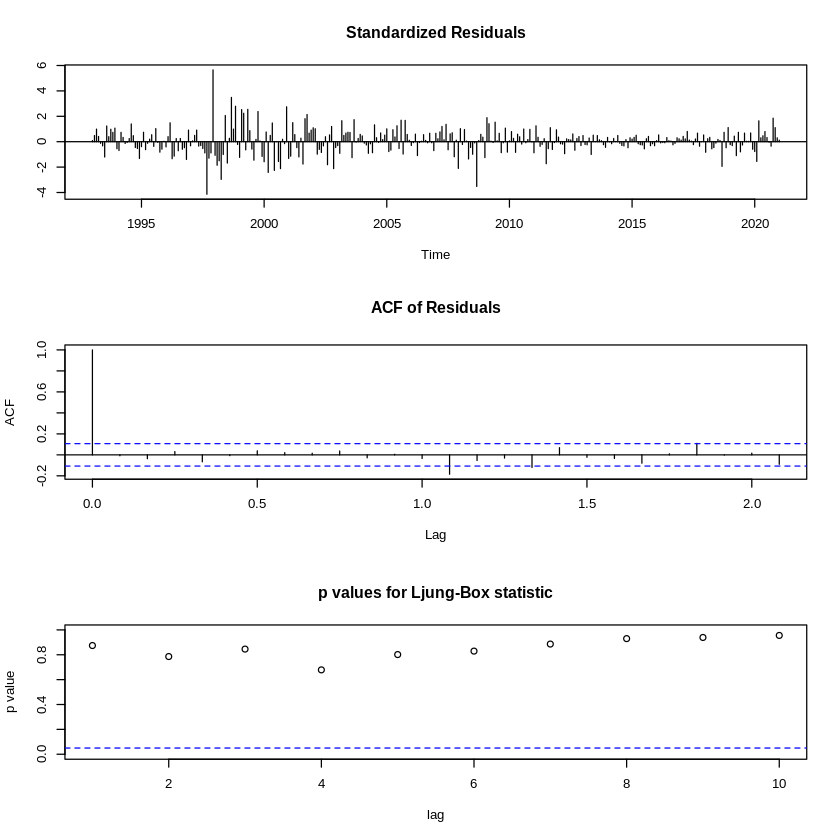

In [ ]:
#ARIMA모형의 진단(잔차분석)
tsdiag(kospi_fit)

## 예 5-8 로그변환된 종합주가지수의 ARIMA추정모형을 이용한 예측
ARIMA(0, 1, 1)로 1년간 예측함

h : 개월 수

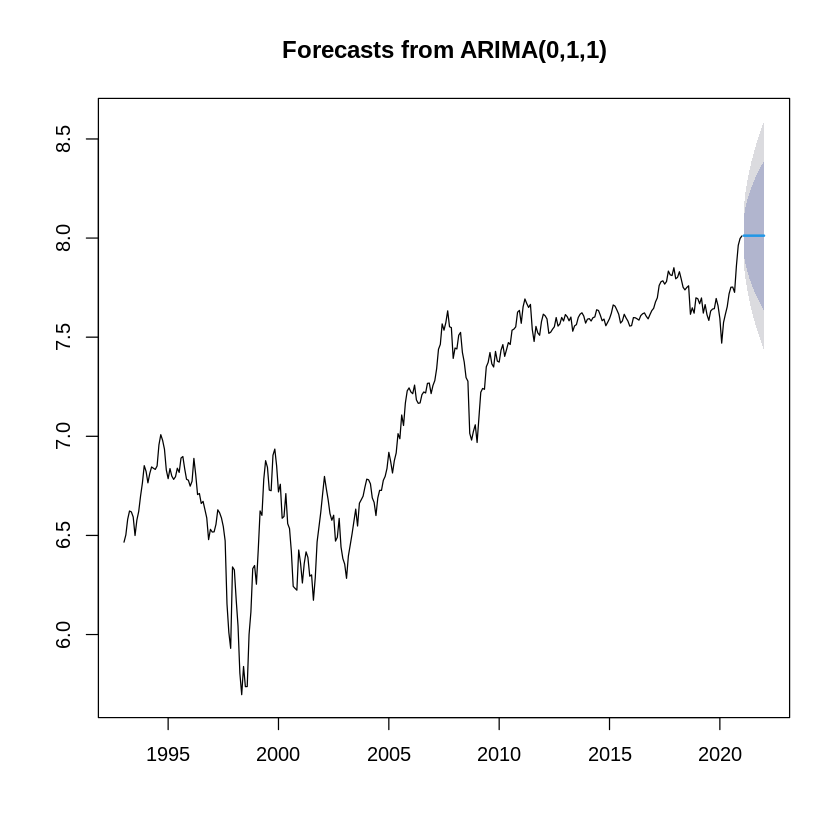

In [ ]:
#ARIMA모형의 예측(h=예측개월 수)
plot(forecast(kospi_fit, h=12))

##GARCH모형의 작성
일별 종합주가지수 로그수익률에 대한 GARCH모형을 작성하는 코드드